In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import scprep
import matplotlib.pyplot as plt

Since the reconstruction is the same as the decoding from phate, we can directly learn mioflow trajectories on the phate space -- this will reduce error.

In [2]:
adata = sc.read_h5ad(f"../data/4-gaga.h5ad")

In [3]:
adata.obs['day'].value_counts()

12.0    4305
18.0    4040
30.0    2971
0.0     2837
2.0     2832
Name: day, dtype: int64

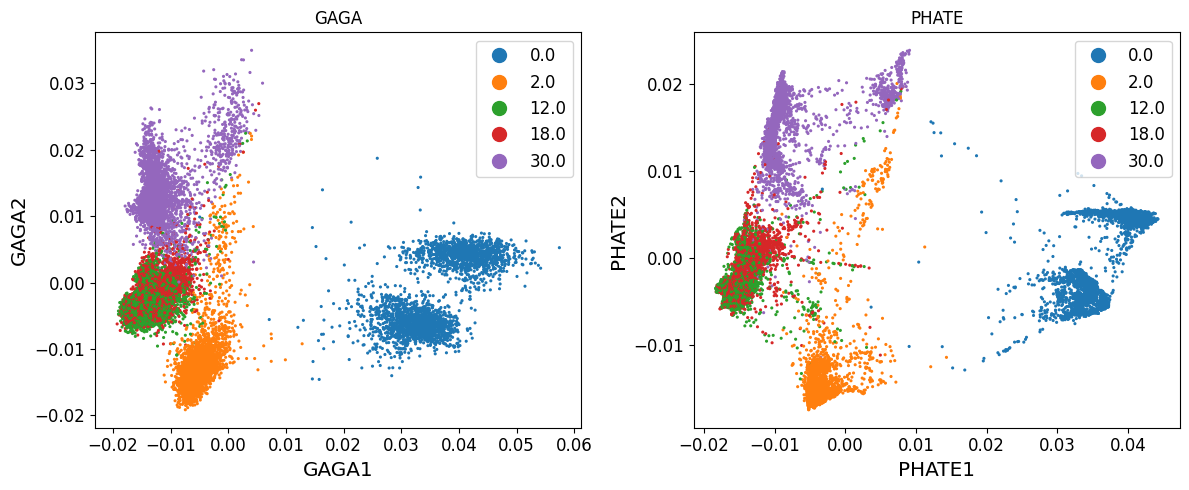

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

scprep.plot.scatter2d(adata.obsm['X_gaga'], c=adata.obs['day'], ticks=True, label_prefix="GAGA", ax=ax1)
ax1.set_title("GAGA")

scprep.plot.scatter2d(adata.obsm['X_phate'], c=adata.obs['day'], ticks=True, label_prefix="PHATE", ax=ax2)
ax2.set_title("PHATE")

plt.tight_layout()
plt.show()

In [5]:
# merging 12 and 18 because they are mostly overlapping.
time_dict = {
    0.0: 0,
    2.0: 1,
    12.0: 2,
    18.0: 3,
    30.0: 4,
}
adata.obs['time'] = adata.obs['day'].map(time_dict)

<Axes: >

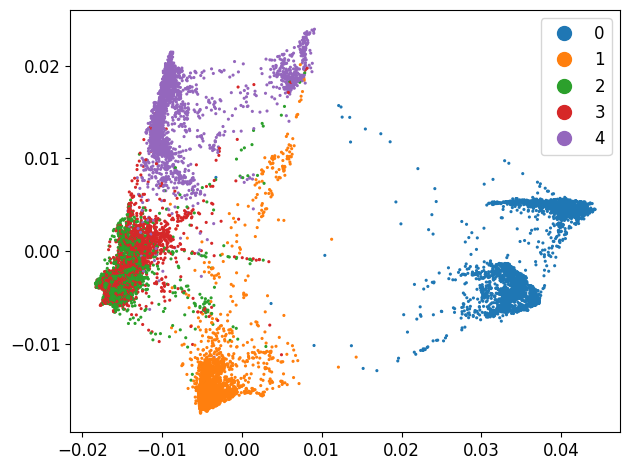

In [6]:
scprep.plot.scatter2d(adata.obsm['X_phate'], adata.obs['time'])

In [7]:
mioflow_df = pd.DataFrame(adata.obsm['X_phate'], columns=['d1', 'd2'])
mioflow_df['samples'] = adata.obs['time'].values
mioflow_df.to_csv(f'../data/5-mioflow_data.csv', index=False)

# subsample to 1000 cells
df = mioflow_df.sample(n=1000, random_state=42)
df.to_csv(f'../data/5-mioflow_data_subsample.csv', index=False)

In [8]:
df.value_counts('samples')

samples
2    290
3    224
4    174
1    161
0    151
dtype: int64